<a href="https://colab.research.google.com/github/mmridull/data-driven-market-optimizer/blob/main/Data_Driven_market_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [ ]:
import pandas as pd
transactions = pd.read_csv('/content/Copy of transaction_data.csv')
customers = pd.read_csv('/content/Copy of purchase_behaviour.csv')
print("Transactions Data:")
print(transactions.head())
print("\nCustomers Data:")
print(customers.head())
merged_data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
merged_data['Cost'] = merged_data['TOT_SALES'] * 0.7
merged_data['Profit'] = merged_data['TOT_SALES'] - merged_data['Cost']
top_products = merged_data.groupby('PROD_NBR')['Profit'].sum().nlargest(3).reset_index()

print("\nTop 3 Most Profitable Products:")
print(top_products)




**Best Selling Product ananlysis**

In [ ]:
bestselling_products = merged_data.groupby('PROD_NBR')['PROD_QTY'].sum().nlargest(3).reset_index()
print("\nTop 3 Bestselling Products:")
print(bestselling_products)

**Identify loyal customers**

In [ ]:
loyal_customers = merged_data.groupby('LYLTY_CARD_NBR').agg({'TXN_ID':'count', 'TOT_SALES':'sum'}).reset_index()
loyal_customers.rename(columns={'TXN_ID': 'PurchaseCount', 'TOT_SALES': 'TotalSpend'}, inplace=True)


top_loyal_customers = loyal_customers.nlargest(10, 'PurchaseCount')
top_loyal_customers = pd.merge(top_loyal_customers, customers, on='LYLTY_CARD_NBR', how='left')

print("\nTop 10 Loyal Customers:")
print(top_loyal_customers)


** Customer Segmentation using K-Means Clustering**

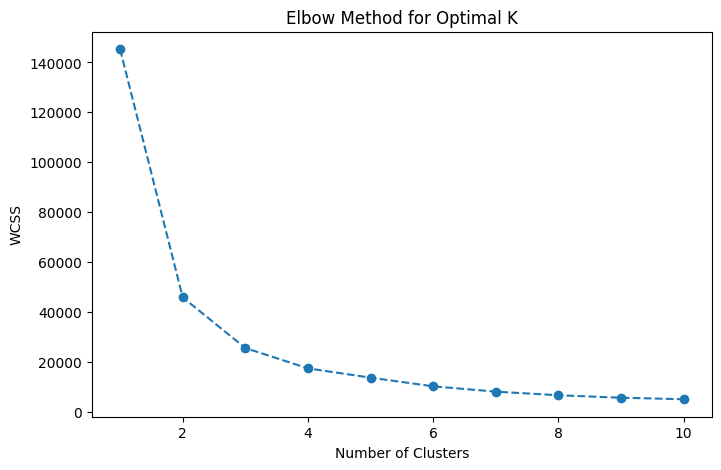


Customer Clusters:
         LYLTY_CARD_NBR  PurchaseCount  TotalSpend
Cluster                                           
0         134614.649634       4.408607   33.549179
1         135778.815882       8.139481   60.621614
2         137368.343638       1.577987   10.226461


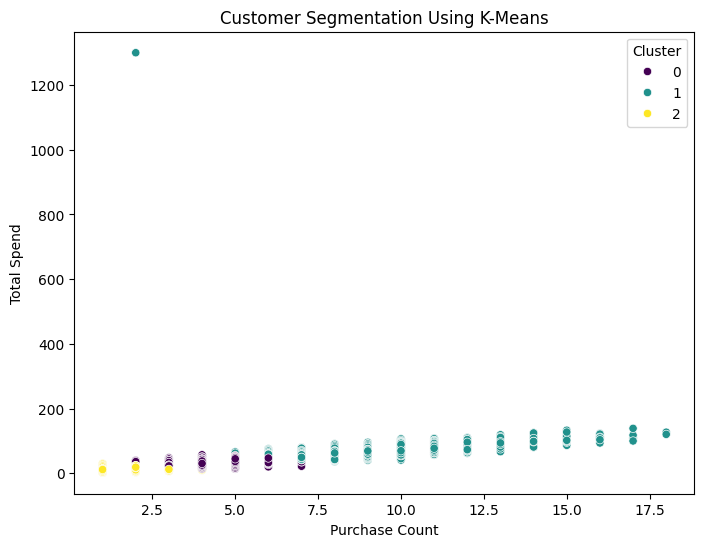

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
customer_features = loyal_customers[['PurchaseCount', 'TotalSpend']]
scaled_features = scaler.fit_transform(customer_features)


wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_features)
loyal_customers['Cluster'] = kmeans.labels_

print("\nCustomer Clusters:")
print(loyal_customers.groupby('Cluster').mean())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=loyal_customers['PurchaseCount'], y=loyal_customers['TotalSpend'], hue=loyal_customers['Cluster'], palette='viridis')
plt.xlabel("Purchase Count")
plt.ylabel("Total Spend")
plt.title("Customer Segmentation Using K-Means")
plt.show()

**Analysis characterstics and business insights**

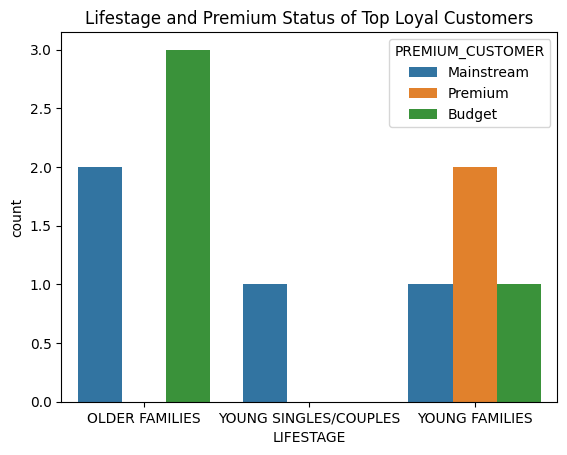


Business Insights: The top 3 bestselling products indicate customer preferences and should be stocked more. The most loyal customers tend to be premium buyers in specific lifestages, suggesting targeted promotions and personalized offers. The K-Means clustering further segments customers, allowing refined marketing strategies based on cluster characteristics.

Hypothesis: Our most loyal customers tend to belong to specific lifestages and premium tiers, likely due to purchasing habits and brand preferences. They may prefer premium products due to financial stability. Clustering helps identify groups with similar behaviors, aiding targeted marketing.


In [17]:
sns.countplot(data=top_loyal_customers, x='LIFESTAGE', hue='PREMIUM_CUSTOMER')
plt.title("Lifestage and Premium Status of Top Loyal Customers")
plt.show()

insights = "The top 3 bestselling products indicate customer preferences and should be stocked more. The most loyal customers tend to be premium buyers in specific lifestages, suggesting targeted promotions and personalized offers. The K-Means clustering further segments customers, allowing refined marketing strategies based on cluster characteristics."
print("\nBusiness Insights:", insights)

hypothesis = "Our most loyal customers tend to belong to specific lifestages and premium tiers, likely due to purchasing habits and brand preferences. They may prefer premium products due to financial stability. Clustering helps identify groups with similar behaviors, aiding targeted marketing."
print("\nHypothesis:", hypothesis)

# New Section